# Lid-Driven Cavity case (LDC)

This test case considers a box with a moving lid, where the velocity is initially at rest.

We start by loading IncompressibleNavierStokes and a Makie plotting backend.

In [1]:
using IncompressibleNavierStokes

if haskey(ENV, "GITHUB_ACTIONS")
    using CairoMakie
else
    using GLMakie
end

## Build problem

We may choose the floating point type for the simulations. Replacing `Float64` with
`Float32` will not necessarilily speed up the simulations, but requires half as much
memory.

In [2]:
T = Float64

Float64

Available viscosity models are:

- `LaminarModel`,
- `KEpsilonModel`,
- `MixingLengthModel`,
- `SmagorinskyModel`, and
- `QRModel`.

They all take a Reynolds number as a parameter. Here we choose a moderate Reynolds number.

In [3]:
viscosity_model = LaminarModel{T}(; Re = 1000)

LaminarModel{Float64}(1000.0)

viscosity_model = KEpsilonModel{T}(; Re = 3000)
viscosity_model = MixingLengthModel{T}(; Re = 3000)
viscosity_model = SmagorinskyModel{T}(; Re = 3000)
viscosity_model = QRModel{T}(; Re = 3000)

Available convection models are:

- `NoRegConvectionModel`,
- `C2ConvectionModel`,
- `C4ConvectionModel`, and
- `LerayConvectionModel`.

We here take the simplest model.

In [4]:
convection_model = NoRegConvectionModel{T}()

NoRegConvectionModel{Float64}()

We create a two-dimensional domain with a box of size `[1, 1]`.

In [5]:
x = nonuniform_grid(0, 1, 100)
y = nonuniform_grid(0, 1, 100)
grid = create_grid(x, y; T);

Solver settings are used by certain implicit solvers.

In [6]:
solver_settings = SolverSettings{T}(;
    pressure_solver = DirectPressureSolver{T}(),    # Pressure solver
    p_add_solve = true,                             # Additional pressure solve for second order pressure
    abstol = 1e-10,                                 # Absolute accuracy
    reltol = 1e-14,                                 # Relative accuracy
    maxiter = 10,                                   # Maximum number of iterations
    newton_type = :approximate,
)

SolverSettings{Float64}(DirectPressureSolver{Float64}(SuiteSparse.CHOLMOD.Factor{Float64}
type:    LLt
method:  simplicial
maxnnz:  1
nnz:     0
success: true
), true, 1.0e-10, 1.0e-14, 10, :approximate, false)

Dirichlet boundary conditions are specified as plain Julia functions. They are marked by
the `:dirichlet` symbol. Other possible BC types are `:periodic`, `:symmetric`, and `:pressure`.

In [7]:
u_bc(x, y, t, setup) = y ≈ setup.grid.ylims[2] ? 1.0 : 0.0
v_bc(x, y, t, setup) = zero(x)
bc = create_boundary_conditions(
    u_bc,
    v_bc;
    bc_unsteady = false,
    bc_type = (;
        u = (; x = (:dirichlet, :dirichlet), y = (:dirichlet, :dirichlet)),
        v = (; x = (:dirichlet, :dirichlet), y = (:dirichlet, :dirichlet)),
    ),
    T,
)

BC{Float64}(false, (x = (:dirichlet, :dirichlet), y = (:dirichlet, :dirichlet)), (x = (:dirichlet, :dirichlet), y = (:dirichlet, :dirichlet)), NamedTuple(), NamedTuple(), NamedTuple(), NamedTuple(), Main.##275.u_bc, Main.##275.v_bc, IncompressibleNavierStokes.var"#92#120"(), IncompressibleNavierStokes.var"#93#121"(), IncompressibleNavierStokes.var"#94#122"(), IncompressibleNavierStokes.var"#95#123"(), (x = (0, 0), y = (0, 0)), (x = (0, 0), y = (0, 0)), (x = (0, 0), y = (0, 0)), IncompressibleNavierStokes.var"#96#124"())

The body forces are specified as plain Julia functions.

In [8]:
bodyforce_u(x, y) = 0
bodyforce_v(x, y) = 0
force = SteadyBodyForce{T}(; bodyforce_u, bodyforce_v)

SteadyBodyForce{Float64}(Main.##275.bodyforce_u, Main.##275.bodyforce_v, IncompressibleNavierStokes.var"#18#30"(), Float64[])

We may now assemble our setup.

In [9]:
setup = Setup{T,2}(; viscosity_model, convection_model, grid, force, solver_settings, bc)

Setup{Float64, 2}(LaminarModel{Float64}(1000.0), NoRegConvectionModel{Float64}(), Grid{Float64, 2}(false, 81.0, 1.125, 100, 100, 1, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09  …  0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0], [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09  …  0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0], Float64[], [0.005, 0.015000000000000001, 0.025, 0.035, 0.045, 0.055, 0.065, 0.075, 0.085, 0.095  …  0.905, 0.915, 0.9249999999999999, 0.9349999999999999, 0.9450000000000001, 0.955, 0.965, 0.9749999999999999, 0.9850000000000001, 0.995], [0.005, 0.015000000000000001, 0.025, 0.035, 0.045, 0.055, 0.065, 0.075, 0.085, 0.095  …  0.905, 0.915, 0.9249999999999999, 0.9349999999999999, 0.9450000000000001, 0.955, 0.965, 0.9749999999999999, 0.9850000000000001, 0.995], Float64[], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, Float64[]

The discrete operators are built with the `build_operators!` function.

In [10]:
build_operators!(setup);

We will solve for a time interval of ten seconds.

In [11]:
t_start, t_end = tlims = (0.0, 10.0)

(0.0, 10.0)

The initial conditions are defined as plain Julia functions.

In [12]:
initial_velocity_u(x, y) = 0
initial_velocity_v(x, y) = 0
initial_pressure(x, y) = 0
V₀, p₀ = create_initial_conditions(
    setup,
    t_start;
    initial_velocity_u,
    initial_velocity_v,
    initial_pressure,
);

## Solve problems

There are many different problems. They can all be solved by calling the `solve`
function.

A `SteadyStateProblem` is for computing a state where the right hand side of the
momentum equation is zero.

In [13]:
problem = SteadyStateProblem(setup, V₀, p₀);
V, p = @time solve(problem);

Initial momentum residual = 0.001959700502304355
Iteration 1: momentum residual = 0.0012313951884831123
Iteration 2: momentum residual = 0.000369716607138675
Iteration 3: momentum residual = 5.974482625887786e-5
Iteration 4: momentum residual = 1.9325299356319066e-5
Iteration 5: momentum residual = 3.3496153503996548e-6
Iteration 6: momentum residual = 5.089010398378811e-7
Iteration 7: momentum residual = 4.3624343990433714e-10
Iteration 8: momentum residual = 8.55042490803537e-16
  5.264588 seconds (5.44 M allocations: 1.279 GiB, 11.94% gc time, 48.54% compilation time)


For this test case, the same steady state may be obtained by solving an
`UnsteadyProblem` for a sufficiently long time.

In [14]:
problem = UnsteadyProblem(setup, V₀, p₀, tlims);

We may also define a list of iteration processors. They are processed after every
`nupdate` iteration.

In [15]:
logger = Logger(; nupdate = 10)
plotter = RealTimePlotter(; nupdate = 5, fieldname = :vorticity)
writer = VTKWriter(; nupdate = 10, dir = "output/LidDrivenCavity2D")
tracer = QuantityTracer(; nupdate = 1)
processors = [logger, plotter, writer, tracer]

4-element Vector{IncompressibleNavierStokes.Processor}:
 Logger(10)
 RealTimePlotter(5, :vorticity, Observable{Nothing} with 0 listeners. Value:
nothing)
 VTKWriter(10, "output/LidDrivenCavity2D", "solution", WriteVTK.CollectionFile(<?xml version="1.0" encoding="utf-8"?>
<VTKFile type="Collection" version="1.0" byte_order="LittleEndian" compressor="vtkZLibDataCompressor">
  <Collection/>
</VTKFile>
, ".pvd", String[]))
 QuantityTracer(1, Float64[], Float64[], Float64[], Float64[], Float64[], Float64[])

 A ODE method is needed. Here we will opt for a standard fourth order Runge-Kutta method
 with a fixed time step.

┌ Info: Iteration 0
│   t = 0.0
│   norm(F) = 0.01931629832178431
└   maximum(F) = 0.001959700502304355
┌ Info: Iteration 10
│   t = 0.09999999999999999
│   norm(F) = 0.0032577592057126364
└   maximum(F) = 0.000253198710382335
┌ Info: Iteration 20
│   t = 0.20000000000000004
│   norm(F) = 0.0018748111485208893
└   maximum(F) = 0.00014736304892297024
┌ Info: Iteration 30
│   t = 0.3000000000000001
│   norm(F) = 0.0014031980639214083
└   maximum(F) = 0.00010883875365355367
┌ Info: Iteration 40
│   t = 0.4000000000000002
│   norm(F) = 0.0011702332563432642
└   maximum(F) = 8.724059521656317e-5
┌ Info: Iteration 50
│   t = 0.5000000000000002
│   norm(F) = 0.0010363966317081116
└   maximum(F) = 7.329877973401103e-5
┌ Info: Iteration 60
│   t = 0.6000000000000003
│   norm(F) = 0.0009526192542613563
└   maximum(F) = 6.661117312039052e-5
┌ Info: Iteration 70
│   t = 0.7000000000000004
│   norm(F) = 0.0008970479036692324
└   maximum(F) = 6.048264987055767e-5
┌ Info: Iteration 80
│   t = 0.80000

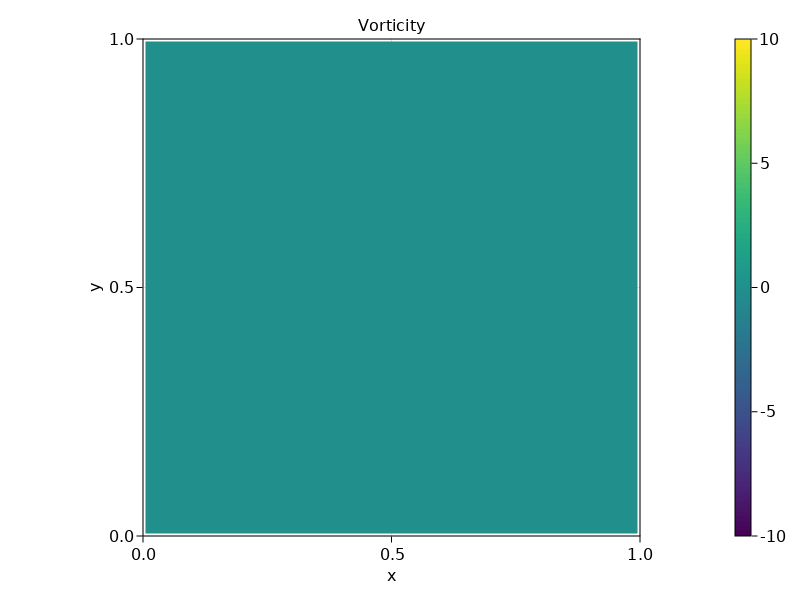

In [16]:
V, p = @time solve(problem, RK44(); Δt = 0.01, processors);

## Postprocess

The `tracer` object contains a history of some quantities related to the momentum and
energy.

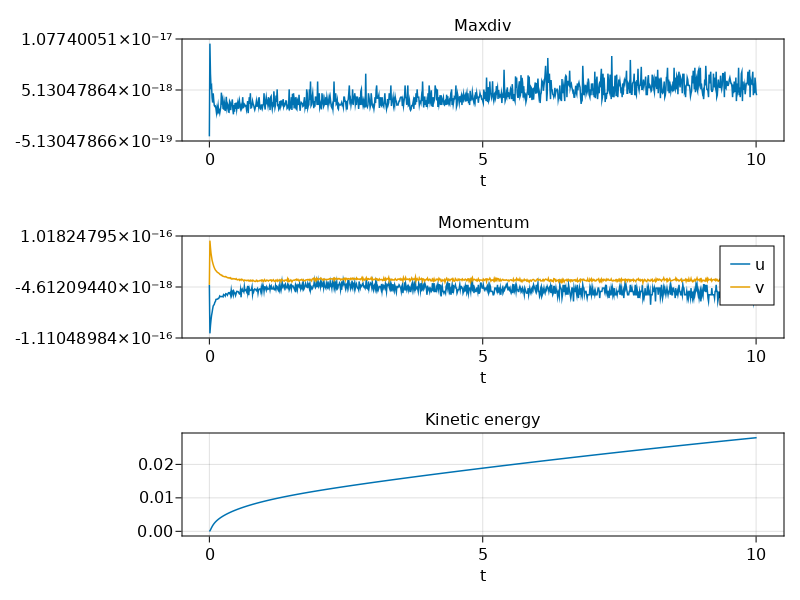

In [17]:
plot_tracers(tracer)

We may also plot the final pressure field,

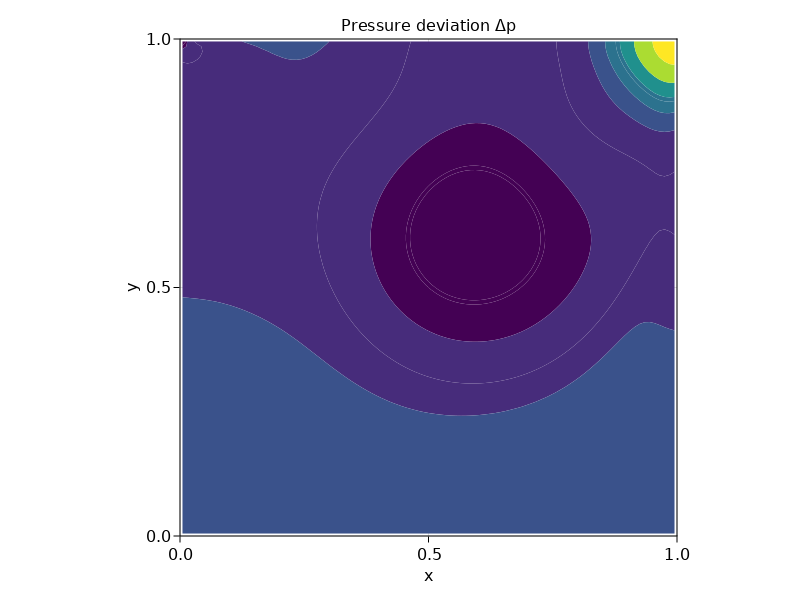

In [18]:
plot_pressure(setup, p)

velocity field,

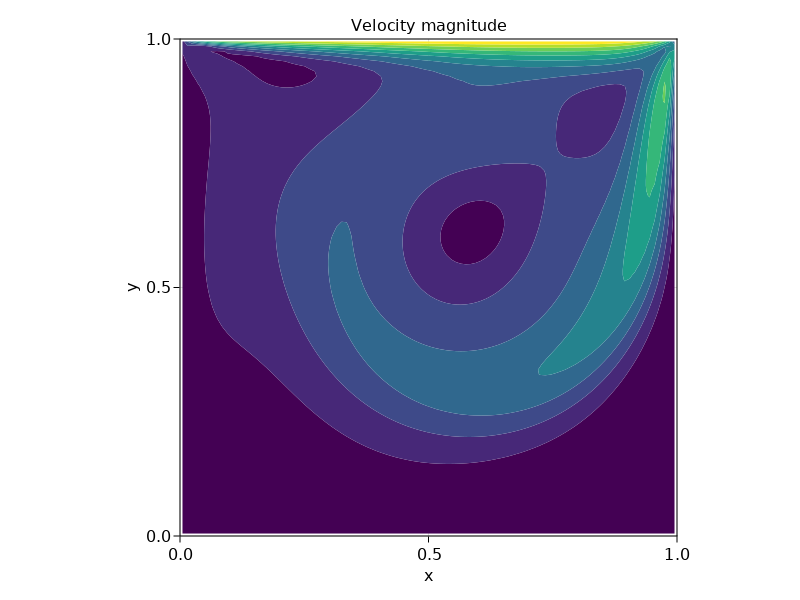

In [19]:
plot_velocity(setup, V, t_end)

vorticity field,

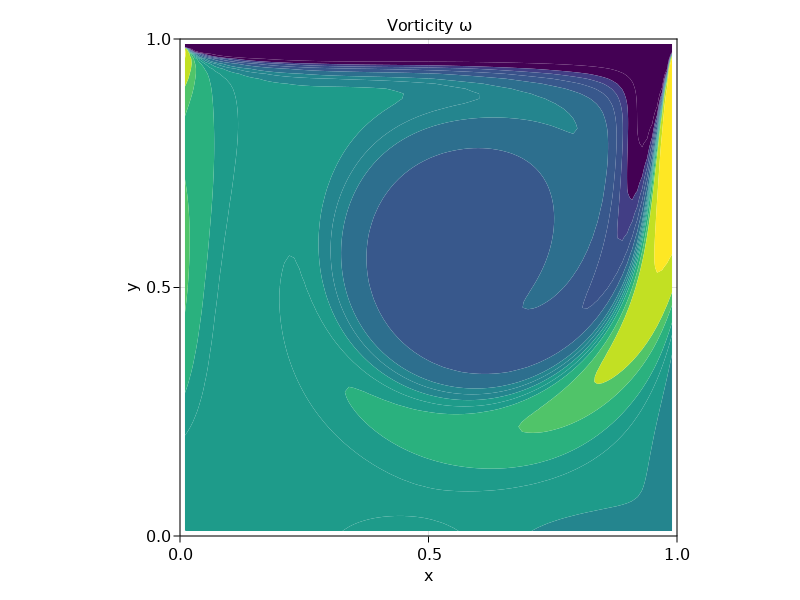

In [20]:
plot_vorticity(setup, V, tlims[2])

or streamfunction.

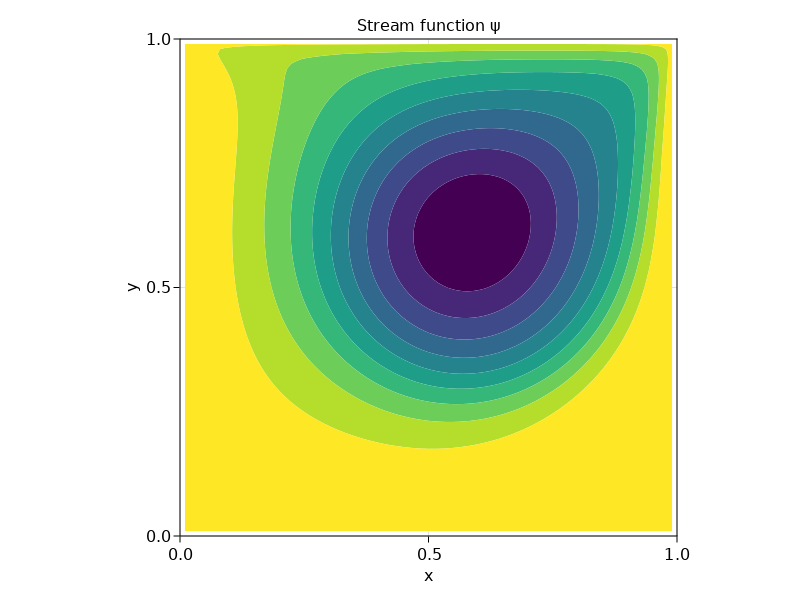

In [21]:
plot_streamfunction(setup, V, tlims[2])

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*